In [4]:
import networkx as nx
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 10)

import warnings

warnings.filterwarnings("ignore")

In [5]:
G = nx.read_adjlist("facebook_social_graph.adjlist")

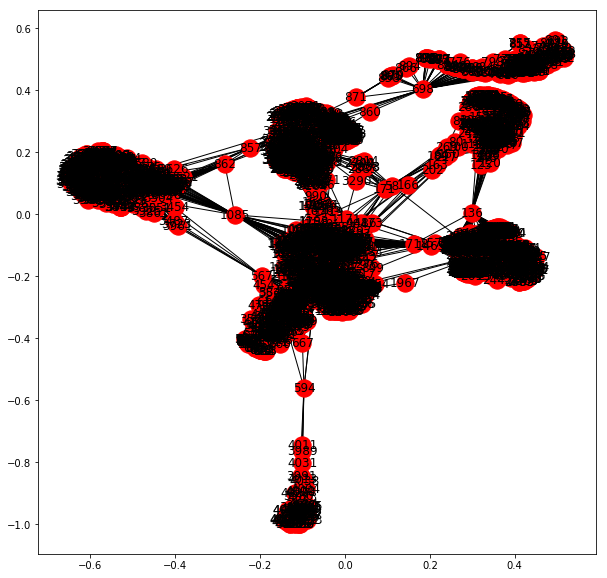

In [11]:
nx.draw_networkx(G)

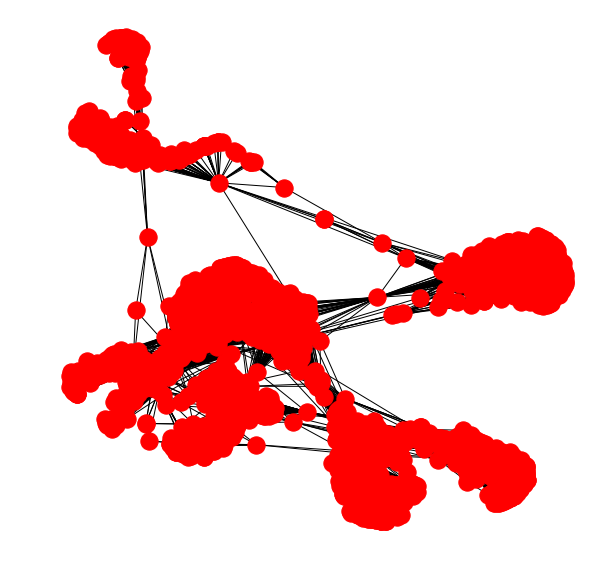

In [12]:
plt.axis("off")
nx.draw_networkx(G, with_labels=False)

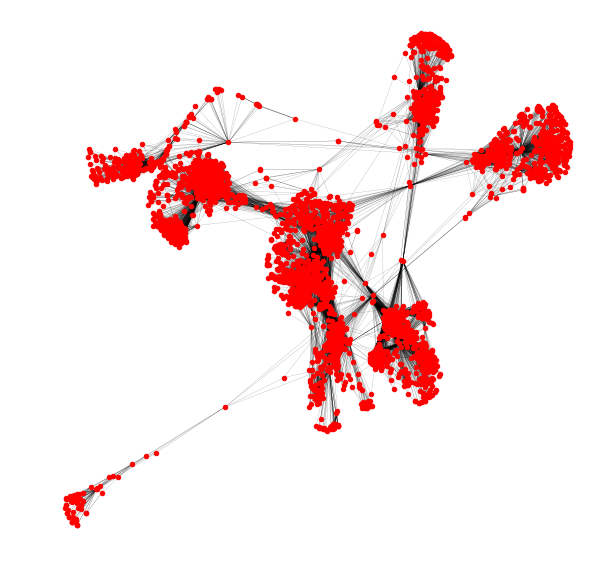

In [6]:
plt.axis("off")
nx.draw_networkx(G, with_labels=False, node_size=20, width=0.1)

In [7]:
pos = nx.spring_layout(G)

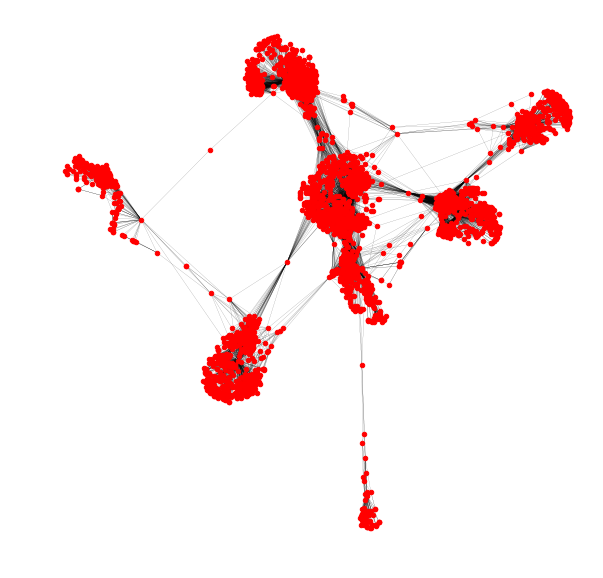

In [16]:
plt.axis("off")
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=20, width=0.1)

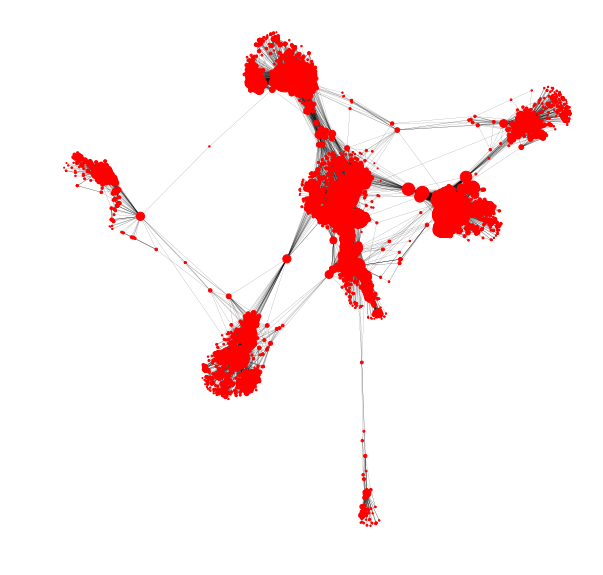

In [17]:
plt.axis("off")
node_sizes = list(map(lambda node: node[1], list(G.degree)))
nx.draw_networkx(G, with_labels=False, pos=pos, node_size=node_sizes, width=0.1)

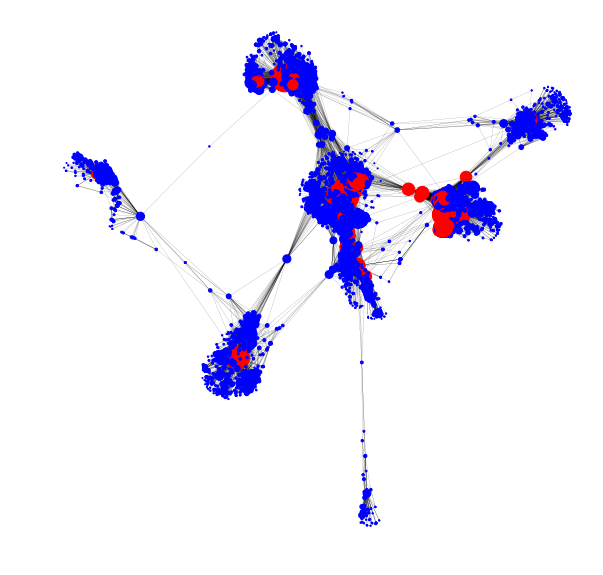

In [18]:
plt.axis("off")
node_sizes = list(map(lambda node: node[1], list(G.degree)))
node_colors = list(map(lambda degree: "b" if degree < 100 else "r", node_sizes))
nx.draw_networkx(
    G,
    with_labels=False,
    pos=pos,
    node_size=node_sizes,
    node_color=node_colors,
    width=0.1,
)

In [19]:
help(nx.draw_networkx)

Help on function draw_networkx in module networkx.drawing.nx_pylab:

draw_networkx(G, pos=None, arrows=True, with_labels=True, **kwds)
    Draw the graph G using Matplotlib.
    
    Draw the graph with Matplotlib with options for node positions,
    labeling, titles, and many other drawing features.
    See draw() for simple drawing without labels or axes.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    
    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See :py:mod:`networkx.drawing.layout` for functions that
       compute node positions.
    
    arrows : bool, optional (default=True)
       For directed graphs, if True draw arrowheads.
       Note: Arrows will be the same color as edges.
    
    arrowstyle : str, optional (default='-|>')
        For directed graphs, choose the style of the arrowsheads.
        See :py:class: `matplo

## End

In [20]:
! pip install bokeh

In [21]:
import networkx as nx
from bokeh.io import show, output_notebook
from bokeh.models import Plot, Range1d, MultiLine, Circle
from bokeh.models.graphs import from_networkx

In [22]:
G = nx.read_adjlist("facebook_social_graph.adjlist")

plot = Plot(
    plot_width=700,
    plot_height=500,
    x_range=Range1d(-1.1, 1.1),
    y_range=Range1d(-1.1, 1.1),
)

plot.title.text = "Facebook Social Network"

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=5)

graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.4, line_width=0.4)

plot.renderers.append(graph_renderer)

In [23]:
output_notebook()
show(plot)

Loading BokehJS ...

In [24]:
from bokeh.models import BoxZoomTool, ResetTool, PanTool

plot.add_tools(PanTool(), BoxZoomTool(), ResetTool())

In [25]:
output_notebook()
show(plot)

Loading BokehJS ...

In [26]:
nx.set_node_attributes(G, dict(G.degree), "node_size")

plot = Plot(
    plot_width=700,
    plot_height=500,
    x_range=Range1d(-1.1, 1.1),
    y_range=Range1d(-1.1, 1.1),
)

plot.title.text = "Facebook Social Network"

plot.add_tools(PanTool(), BoxZoomTool(), ResetTool())

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size="node_size")

graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.4, line_width=0.4)

plot.renderers.append(graph_renderer)

In [27]:
output_notebook()
show(plot)

Loading BokehJS ...

In [28]:
size = 0.5
l = 0.5


def box_cox_normalization(node_size):
    from math import ceil
    from math import pow

    compressed_point = (pow(node_size, l) - 1) / l
    return ceil(size * compressed_point)

In [29]:
new_sizes = dict(
    map(lambda node: (node[0], box_cox_normalization(node[1])), dict(G.degree).items())
)

nx.set_node_attributes(G, dict(G.degree), "connections")
nx.set_node_attributes(G, new_sizes, "node_size")

plot = Plot(
    plot_width=700,
    plot_height=500,
    x_range=Range1d(-1.1, 1.1),
    y_range=Range1d(-1.1, 1.1),
)

plot.title.text = "Facebook Social Network"

from bokeh.models import HoverTool

plot.add_tools(
    PanTool(),
    BoxZoomTool(),
    ResetTool(),
    HoverTool(tooltips=[("connections", "@connections")]),
)

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size="node_size")

graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.4, line_width=0.4)

plot.renderers.append(graph_renderer)

In [30]:
output_notebook()
show(plot)

Loading BokehJS ...

In [31]:
new_sizes = dict(
    map(lambda node: (node[0], box_cox_normalization(node[1])), dict(G.degree).items())
)
colors = dict(
    map(
        lambda node: (node[0], "red" if node[1] > 500 else "blue"),
        dict(G.degree).items(),
    )
)

nx.set_node_attributes(G, dict(G.degree), "connections")
nx.set_node_attributes(G, new_sizes, "node_size")
nx.set_node_attributes(G, colors, "node_color")

plot = Plot(
    plot_width=700,
    plot_height=500,
    x_range=Range1d(-1.1, 1.1),
    y_range=Range1d(-1.1, 1.1),
)

plot.title.text = "Facebook Social Network"

from bokeh.models import HoverTool

plot.add_tools(
    PanTool(),
    BoxZoomTool(),
    ResetTool(),
    HoverTool(tooltips=[("connections", "@connections")]),
)

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size="node_size", fill_color="node_color")

graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.4, line_width=0.4)

plot.renderers.append(graph_renderer)

In [32]:
output_notebook()
show(plot)

Loading BokehJS ...

In [33]:
help(Circle)
help(MultiLine)

Help on class Circle in module bokeh.models.markers:

class Circle(Marker)
 |  Circle(**kwargs)
 |  
 |  Render circle markers. 
 |  
 |  Example
 |  -------
 |  
 |  .. bokeh-plot:: ../examples/reference/models/Circle.py
 |      :source-position: below
 |  
 |  Method resolution order:
 |      Circle
 |      Marker
 |      bokeh.models.glyphs.XYGlyph
 |      bokeh.models.glyphs.Glyph
 |      bokeh.model.Model
 |      bokeh.core.has_props.HasProps
 |      bokeh.util.callback_manager.PropertyCallbackManager
 |      bokeh.util.callback_manager.EventCallbackManager
 |      builtins.object
 |  
 |  Data descriptors defined here:
 |  
 |  radius
 |      The radius values for circle markers (in "data space" units, by default).
 |      
 |      .. note::
 |          Circle markers are slightly unusual in that they support specifying
 |          a radius in addition to a size. Only one of ``radius`` or ``size``
 |          should be given.
 |      
 |      .. warning::
 |          Note that ``

In [1]:
# Cells below are used to produce the visualisations for "A primer on visual network analysis"

G = nx.read_adjlist("facebook_social_graph.adjlist")

plot = Plot(
    plot_width=700,
    plot_height=500,
    x_range=Range1d(-1.1, 1.1),
    y_range=Range1d(-1.1, 1.1),
)

plot.title.text = "Facebook Social Network"

graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=5)

graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.1, line_width=0.1)

plot.renderers.append(graph_renderer)

NameError: name 'nx' is not defined

In [ ]:
output_notebook()
show(plot)

In [ ]:
G = nx.read_adjlist("facebook_social_graph.adjlist")

plot = Plot(
    plot_width=700,
    plot_height=500,
    x_range=Range1d(-1.1, 1.1),
    y_range=Range1d(-1.1, 1.1),
)

plot.title.text = "Facebook Social Network"

graph_renderer = from_networkx(G, nx.spectral_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size=5)

graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.1, line_width=0.1)

plot.renderers.append(graph_renderer)

In [ ]:
output_notebook()
show(plot)

In [ ]:
def get_influence_colour(num_connections):
    if num_connections > 500:
        return "red"
    elif 50 < num_connections < 500:
        return "orange"
    else:
        return "blue"

In [ ]:
new_sizes = dict(
    map(lambda node: (node[0], box_cox_normalization(node[1])), dict(G.degree).items())
)
colors = dict(
    map(lambda node: (node[0], get_influence_colour(node[1])), dict(G.degree).items())
)

nx.set_node_attributes(G, dict(G.degree), "connections")
nx.set_node_attributes(G, new_sizes, "node_size")
nx.set_node_attributes(G, colors, "node_color")

plot = Plot(
    plot_width=700,
    plot_height=500,
    x_range=Range1d(-1.1, 1.1),
    y_range=Range1d(-1.1, 1.1),
)

plot.title.text = "Facebook Social Network"

from bokeh.models import HoverTool

plot.add_tools(
    PanTool(),
    BoxZoomTool(),
    ResetTool(),
    HoverTool(tooltips=[("connections", "@connections")]),
)

graph_renderer = from_networkx(G, nx.spring_layout, scale=1, center=(0, 0))

graph_renderer.node_renderer.glyph = Circle(size="node_size", fill_color="node_color")

graph_renderer.edge_renderer.glyph = MultiLine(line_alpha=0.4, line_width=0.4)

plot.renderers.append(graph_renderer)

In [ ]:
output_notebook()
show(plot)